# Librerías

Las que se van a usar para este proyecto son:
- Pandas
- Matplotlib
- Numpy

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Lectura del DataFrame
Debido a que se en utf-8 no se lee el archivo, el `encoding='latin-1'` permite que se pueda leer el archivo. Es un archivo que está dividido por comas, entonces se debe inicializar a `delimiter=','`. Por sugerencia del motor el último parámetro es inicializado como `low_memory=False`

In [2]:
df = pd.read_csv('Base_2020.csv', delimiter=',', encoding='latin-1', low_memory=False)
df.columns

Index(['cod_encuesta', 'id_base', 'tipo_encuesta', 'fecha_encuesta',
       'id_encuestador', 'modulo0', 'tamano', 'sector', 'p_f1_f1', 'p_f2_f2',
       ...
       'p_p67_p67_6', 'p_p68_p68', 'p_p69_p69_1', 'p_p69_p69_2', 'p_p69_p69_3',
       'p_p69_p69_4', 'p_p69_p69_5', 'p_p70_p70', 'p_p71_p71', 'fexp'],
      dtype='object', length=501)

# Control de muestra
A continuación, se muestra cómo están divididas las empresas de acuerdo a si son; microempresa, pequeña, mediana o grande.

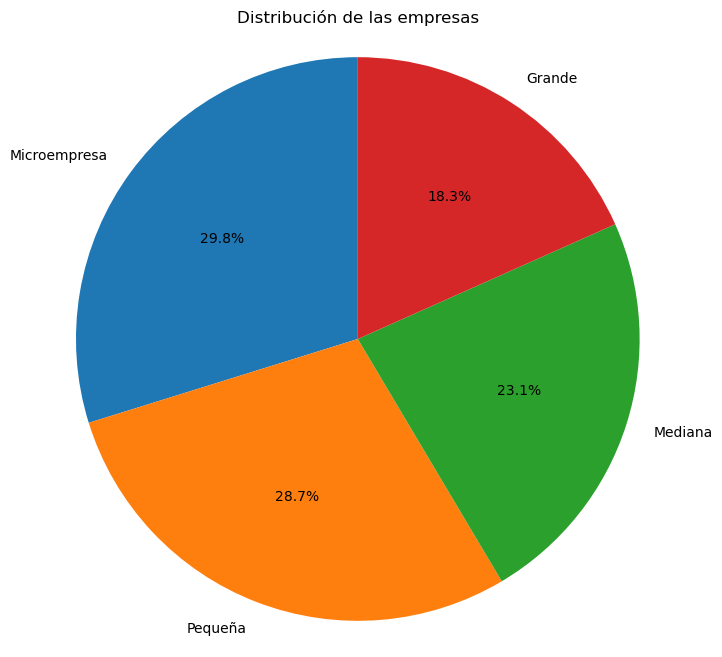

In [3]:
microEmpresa = df[df['p_f1_f1']==2].shape[0]
pequeña = df[df['p_f1_f1']==3].shape[0]
mediana = df[df['p_f1_f1']==4].shape[0]
grande = df[df['p_f1_f1']==5].shape[0]

nombres = ['Microempresa', 'Pequeña', 'Mediana', 'Grande']


plt.figure(figsize=(8,8))
plt.pie([microEmpresa, pequeña, mediana, grande], labels=nombres, autopct='%1.1f%%', startangle=90 )
plt.axis('equal')
plt.title('Distribución de las empresas')
plt.show()

# Matriz con datos filtrados por tamaño de empresa
A continuación, se presentan las matrices que se tienen para almacenar los datos de las empresas que han sufrido algún tipo de delito. Los datos están agrupados por el tamaño de la empresa, de esta manera:

- `microDelito`: Representa las microempresas que han sido víctimas de algún tipo de delito. 
- `pequeDelito`: Pequeñas empresas que han sido víctimas de cualquier tipo de delito. 
- `mediDelito`: Empresas medianas que han sido víctimas de cualquier tipo de delito.
- `grandDelito`: Empresas grandes que han sufrido algún tipo de delito.

Cada fila de la variable representa un vector con 6 componentes, las cuales representan el delito que sufrió la empresa, (1) lo sufrió y (2) no ha sido víctima. Estos delitos, son en orden:
1. **Hurto.**
2. **Delitos Informáticos.**
3. **Fraude.**
4. **Extorsión.**
5. **Estafa.**
6. **Hurto de automóviles de maquinaria.**

Cada matriz va a tener el siguiente formato donde los elementos van a ser $a_{ij}$, $i$ va a simbolizar la fila y $j$ la columna:
$$
\begin{pmatrix}
    a_{00} & a_{01} & \cdots & a_{06} \\
    a_{10} & a_{11} & \cdots & a_{16} \\
    \vdots & \vdots & \ddots & \vdots \\
    a_{n0} & a_{n1} & \cdots & a_{n6}
\end{pmatrix}
$$

Cada fila representa una empresa que ha sido encuestada, por lo tanto para acceder a lo que diligenció la empresa en la encuesta, basta con utilizar `matriz[i]`. Por ejemplo, si se desea saber qué delitos sufrió la primera empresa del conjunto de las microempresas robadas, entonces, se utiliza:
```python
microDelito[0]
>>> array([1., 2., 2., 2., 2., 2.])
```
Esto nos quiere decir que la primera empresa que fue víctima de algún tipo de delito del conjunto de las microempresas robadas sufrió únicamente del delito de **Hurto**.

Así, se obtienen los vectores para cada empresa de esta segmentación que se realizó.

Para cada variable se pueden recorrer los valores en los rangos de $(fila,\ columna)$:
- `microDelito` Dimensión: $(98,\ 6)$
- `pequeDelito` Dimensión: $(102,\ 6)$
- `mediDelito` Dimensión: $(85,\ 6)$
- `grandDelito` Dimensión: $(60,\ 6)$

Total de empresas que han sufrido de algún tipo de delito: $345$

In [5]:
# Microempresas que han sido víctimas de cualquier delito
microDelito = df[(df['p_p66_p66'] == 1) & (df['p_f1_f1'] == 2)][['p_p67_p67_1', 'p_p67_p67_2', 'p_p67_p67_3', 
                                                                'p_p67_p67_4','p_p67_p67_5', 'p_p67_p67_6']].to_numpy()

# Empresas pequeñas que han sido víctimas de cualquier delito
pequeDelito = df[(df['p_p66_p66'] == 1) & (df['p_f1_f1'] == 3)][['p_p67_p67_1', 'p_p67_p67_2', 'p_p67_p67_3',
                                                              'p_p67_p67_4', 'p_p67_p67_5', 'p_p67_p67_6']].to_numpy()

# Empresas medianas que han sido víctimas de cualquier delito
mediDelito = df[(df['p_p66_p66'] == 1) & (df['p_f1_f1'] == 4)][['p_p67_p67_1', 'p_p67_p67_2', 'p_p67_p67_3',
                                                              'p_p67_p67_4', 'p_p67_p67_5', 'p_p67_p67_6']].to_numpy()

# Empresas grandes que han sido víctimas de cualquier delito
grandDelito = df[(df['p_p66_p66'] == 1) & (df['p_f1_f1'] == 5)][['p_p67_p67_1', 'p_p67_p67_2', 'p_p67_p67_3',
                                                              'p_p67_p67_4', 'p_p67_p67_5', 'p_p67_p67_6']].to_numpy()

In [32]:
df[(df['p_p66_p66'] == 1) & (df['sector'] == 'OTROS SERVICIOS')]

,cod_encuesta,id_base,tipo_encuesta,fecha_encuesta,id_encuestador,modulo0,tamano,sector,p_f1_f1,p_f2_f2,...,p_p67_p67_6,p_p68_p68,p_p69_p69_1,p_p69_p69_2,p_p69_p69_3,p_p69_p69_4,p_p69_p69_5,p_p70_p70,p_p71_p71,fexp
128,001GDC_Clima_de_los_Negocios,bog_129,Presencial,27/01/2020,CA53,Identificación,1. Microempresa,OTROS SERVICIOS,2,1,...,2.0,1.0,2.0,2.0,1.0,2.0,2.0,1,1,418.683453
129,001GDC_Clima_de_los_Negocios,bog_130,Presencial,16/01/2020,CA11,Identificación,1. Microempresa,OTROS SERVICIOS,2,1,...,2.0,1.0,1.0,2.0,2.0,2.0,2.0,1,1,418.683453
130,001GDC_Clima_de_los_Negocios,bog_131,Presencial,29/01/2020,CA24,Identificación,1. Microempresa,OTROS SERVICIOS,2,1,...,2.0,1.0,2.0,2.0,1.0,2.0,2.0,1,1,418.683453
131,001GDC_Clima_de_los_Negocios,bog_132,Presencial,13/01/2020,CA34,Identificación,1. Microempresa,OTROS SERVICIOS,2,1,...,2.0,2.0,NaN,NaN,NaN,NaN,NaN,1,1,418.683453
136,001GDC_Clima_de_los_Negocios,bog_137,Presencial,13/01/2020,CA42,Identificación,1. Microempresa,OTROS SERVICIOS,2,1,...,2.0,1.0,2.0,2.0,1.0,2.0,2.0,1,1,418.683453
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1906,001GDC_Clima_de_los_Negocios,bog_1907,Presencial,26/05/2020,CA16,Identificación,1. Microempresa,OTROS SERVICIOS,2,1,...,2.0,1.0,2.0,2.0,2.0,2.0,1.0,1,2,418.683453
1944,001GDC_Clima_de_los_Negocios,bog_1945,Telefónico,20/05/2020,CA1,Identificación,2. Pequeña,OTROS SERVICIOS,3,1,...,2.0,2.0,NaN,NaN,NaN,NaN,NaN,1,1,162.033058
1955,001GDC_Clima_de_los_Negocios,bog_1956,Telefónico,30/04/2020,CA1,Identificación,3. Mediana,OTROS SERVICIOS,4,1,...,2.0,1.0,2.0,2.0,1.0,2.0,2.0,1,1,60.893617
2094,001GDC_Clima_de_los_Negocios,bog_2095,Virtual,25/04/2020,Virtual,Identificación,4. Grande,OTROS SERVICIOS,5,1,...,1.0,1.0,2.0,2.0,2.0,1.0,2.0,1,1,25.026667


# Comandos útiles
1. Tabular una variable cualitativa `X:df['X'].value_counts(normalize=False)`
2. Seleccionar solo las variables `X, Y: df[['X', 'Y']]`
3. Filtrar cuando la variable `X` es `x: df[df['X']=='x']`
4. Filtrar cuando la variable `X=x & Y=y: df[(df['X']=='x') & (df['Y']=='y')]`
5. Filtrar por texto de variable: `df[df['X'].str.contains('xxxxx')]`
6. Ordenar por la variable `X: df.sort_values(by=['X'], ascending=True)`
7. Bloquear por una o más condiciones: `df.loc[(df['X']=='x') & (df['Y']=='y')]`
8. Redondear decimales: `round(X, 1)`
9. Reemplazar un símbolo para corregir typos `df['X']=df['X'].str.replace('我', 'Yo')`
10. Recodificar valores de variables `df['X'] = df['X'].replace({'a':'A', 'b':'B'})`
11. Agrupar por `df.groupby(['X', 'Y'])['Z'].aggregate(['count', 'mean', 'std'])`
12. Tabulación cruzada `pd.ccrosstab(df['X'], df['Y'], normalize=False)`
13. Crear una tabla dinámica `df.pivot_table(index='X', columns='Y', values='Z', aggfunc='mean')`